In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [140]:
df = pd.read_csv('pokemon_stats_2025.csv')

In [141]:
df.head()

,pokedex_id,name,height,weight,base_experience,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed
0,1,Bulbasaur,7,69,64,grass,poison,45,49,49,65,65,45
1,2,Ivysaur,10,130,142,grass,poison,60,62,63,80,80,60
2,3,Venusaur,20,1000,236,grass,poison,80,82,83,100,100,80
3,4,Charmander,6,85,62,fire,NaN,39,52,43,60,50,65
4,5,Charmeleon,11,190,142,fire,NaN,58,64,58,80,65,80


In [142]:
df.tail()

,pokedex_id,name,height,weight,base_experience,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed
245,246,Larvitar,6,720,60,rock,ground,50,64,50,45,50,41
246,247,Pupitar,12,1520,144,rock,ground,70,84,70,65,70,51
247,248,Tyranitar,20,2020,270,rock,dark,100,134,110,95,100,61
248,249,Lugia,52,2160,306,psychic,flying,106,90,130,90,154,110
249,250,Ho-oh,38,1990,306,fire,flying,106,130,90,110,154,90


In [143]:
df.shape

(250, 13)

In [144]:
df.columns

Index(['pokedex_id', 'name', 'height', 'weight', 'base_experience', 'type_1',
       'type_2', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed'],
      dtype='object')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_id       250 non-null    int64 
 1   name             250 non-null    object
 2   height           250 non-null    int64 
 3   weight           250 non-null    int64 
 4   base_experience  250 non-null    int64 
 5   type_1           250 non-null    object
 6   type_2           115 non-null    object
 7   hp               250 non-null    int64 
 8   attack           250 non-null    int64 
 9   defense          250 non-null    int64 
 10  special_attack   250 non-null    int64 
 11  special_defense  250 non-null    int64 
 12  speed            250 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 25.5+ KB


In [146]:
df.describe()

,pokedex_id,height,weight,base_experience,hp,attack,defense,special_attack,special_defense,speed
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,11.844000,473.768000,136.244000,66.776000,70.944000,68.684000,65.952000,68.452000,65.880000
std,72.312977,10.117962,617.573294,74.252368,29.779879,27.462806,30.439224,27.343525,27.463296,27.286109
min,1.000000,2.000000,1.000000,36.000000,10.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,63.250000,6.000000,88.500000,65.000000,48.500000,50.000000,49.250000,45.000000,50.000000,45.000000
50%,125.500000,10.000000,295.000000,142.000000,65.000000,70.000000,65.000000,64.000000,65.000000,65.000000
75%,187.750000,15.000000,576.250000,175.000000,80.000000,90.000000,85.000000,85.000000,84.500000,85.000000
max,250.000000,92.000000,4600.000000,608.000000,255.000000,134.000000,230.000000,154.000000,230.000000,150.000000


In [147]:
df.describe(include='object')

,name,type_1,type_2
count,250,250,115
unique,250,17,15
top,Bulbasaur,water,flying
freq,1,46,38


In [148]:
df.isnull().sum()

pokedex_id           0
name                 0
height               0
weight               0
base_experience      0
type_1               0
type_2             135
hp                   0
attack               0
defense              0
special_attack       0
special_defense      0
speed                0
dtype: int64

In [149]:
df.isnull().sum().sum()

135

In [150]:
df.duplicated().sum()

0

In [151]:
num_cols = df.select_dtypes(include=('float64', 'int64'))

In [152]:
num_cols.columns

Index(['pokedex_id', 'height', 'weight', 'base_experience', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed'],
      dtype='object')

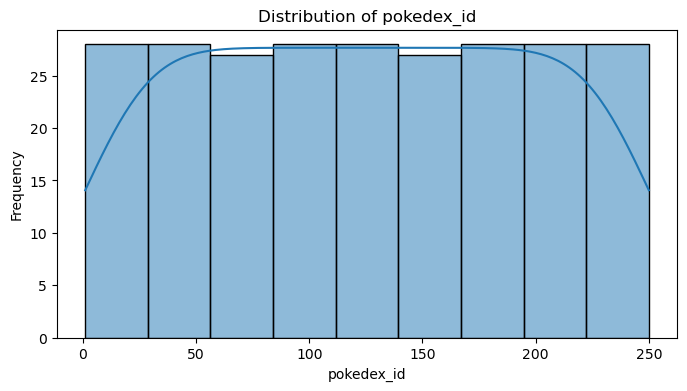

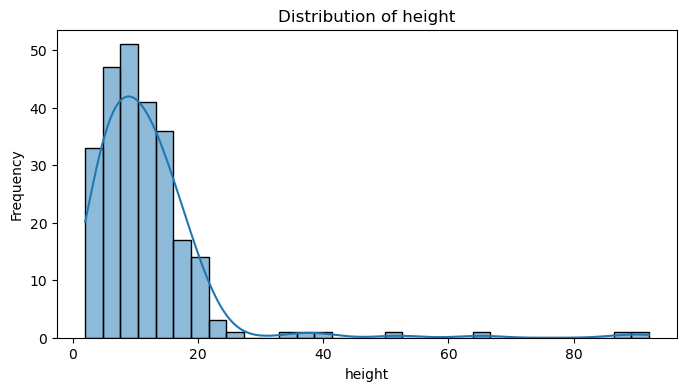

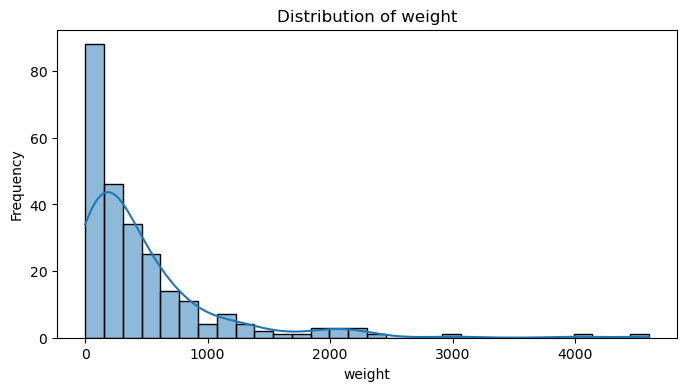

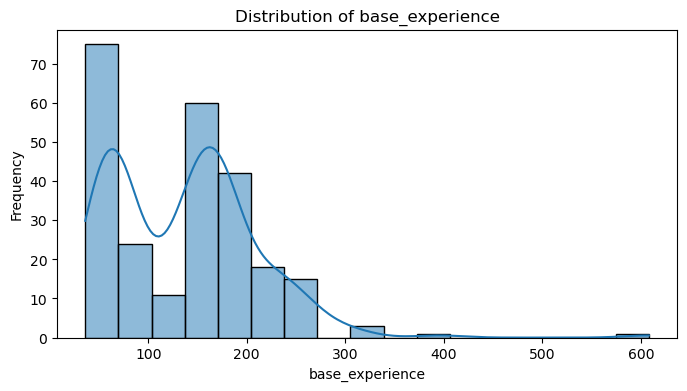

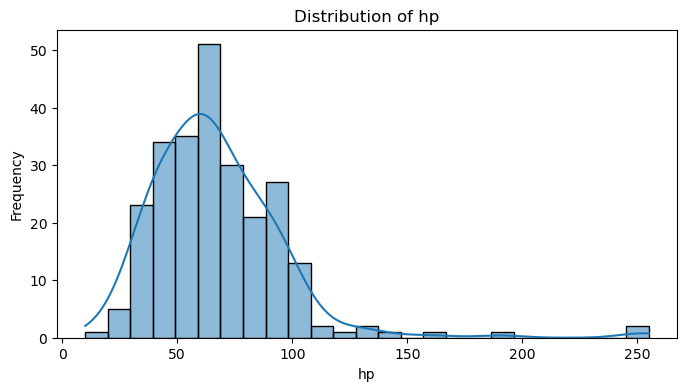

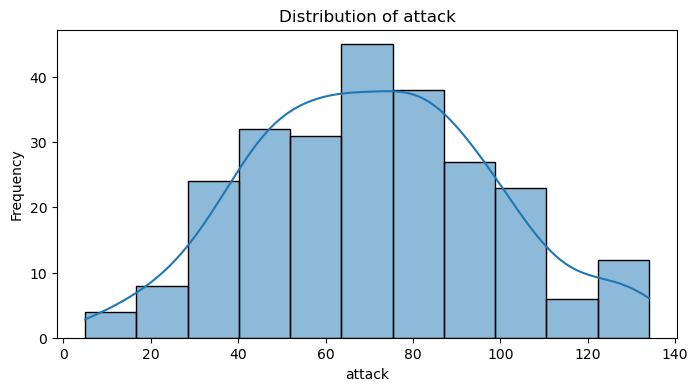

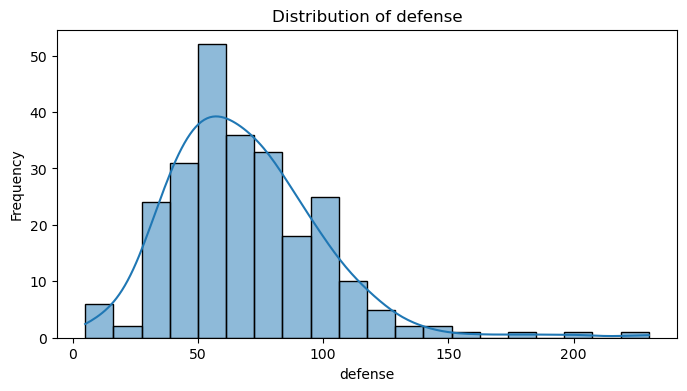

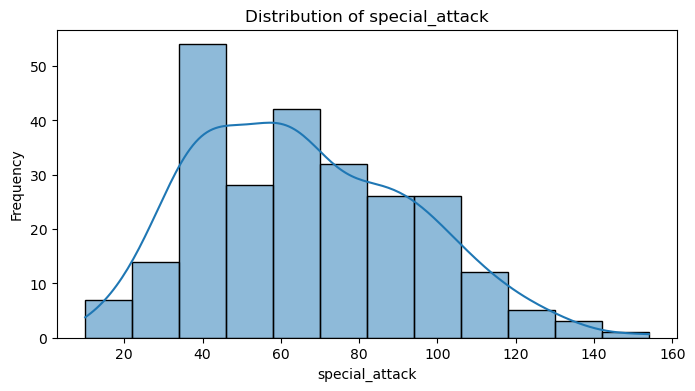

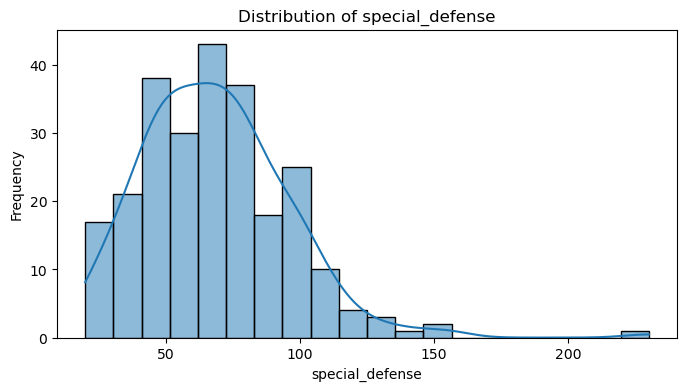

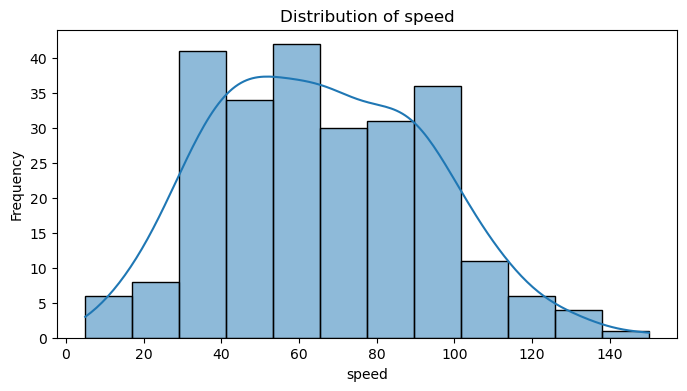

In [153]:
for i in num_cols.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(num_cols[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [154]:
cat_cols = df.select_dtypes(include='object')

In [155]:
cat_cols

,name,type_1,type_2
0,Bulbasaur,grass,poison
1,Ivysaur,grass,poison
2,Venusaur,grass,poison
3,Charmander,fire,NaN
4,Charmeleon,fire,NaN
...,...,...,...
245,Larvitar,rock,ground
246,Pupitar,rock,ground
247,Tyranitar,rock,dark
248,Lugia,psychic,flying


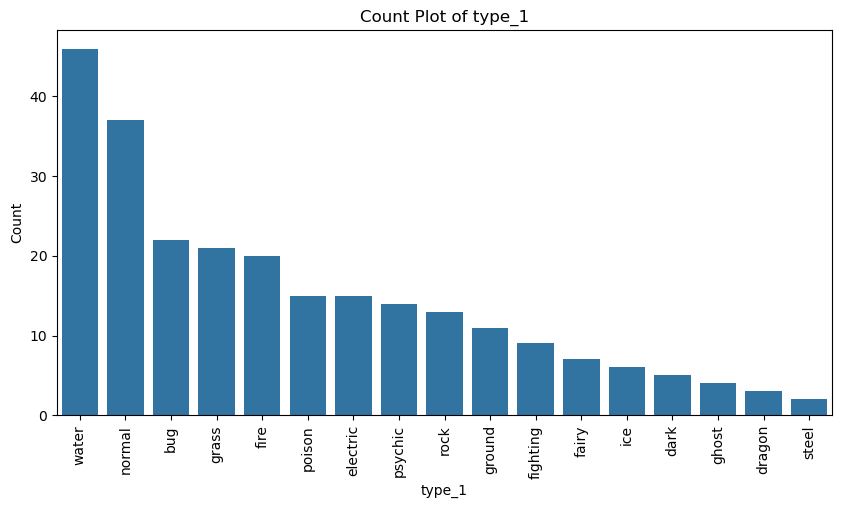

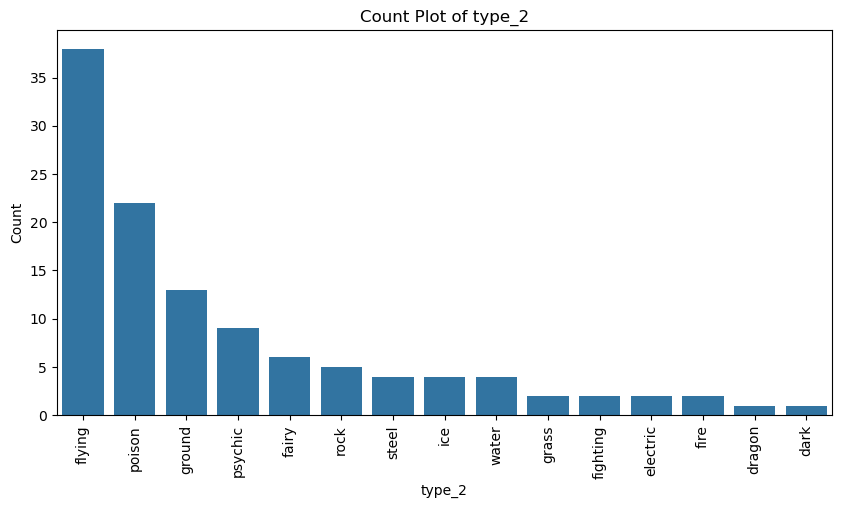

In [156]:
for i in cat_cols.drop(columns=['name']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=i, order=df[i].value_counts().index)
    plt.title(f'Count Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

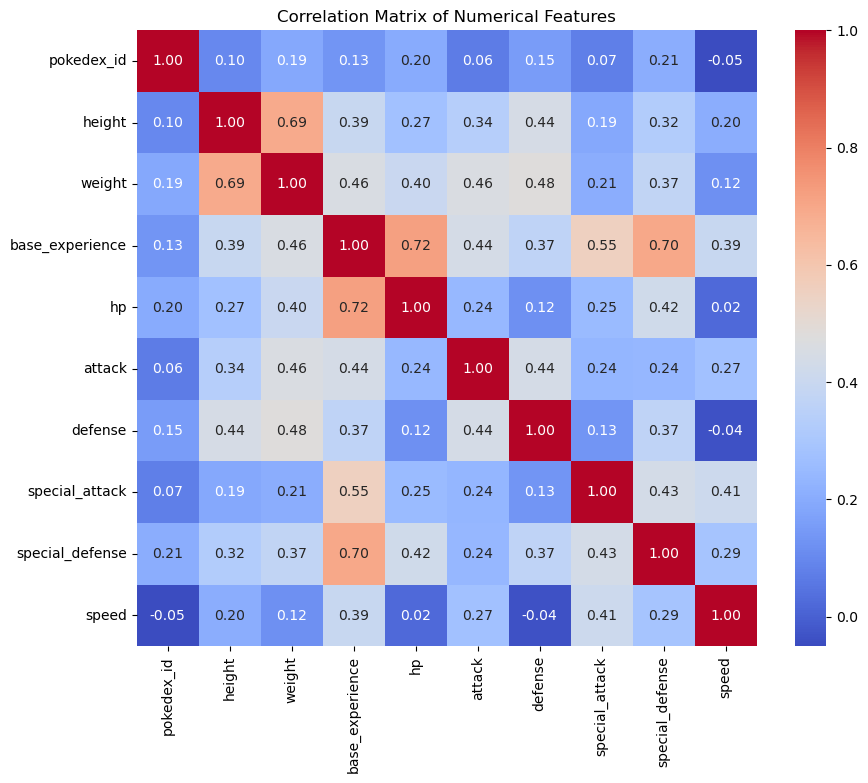

In [157]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [158]:
X = df.drop(columns=["pokedex_id", "name", "type_1"])
y = df["type_1"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [160]:
X_train.head()

,height,weight,base_experience,type_2,hp,attack,defense,special_attack,special_defense,speed
35,13,400,217,NaN,95,70,73,95,90,60
218,8,550,151,rock,60,50,120,90,80,30
135,9,250,184,NaN,65,130,60,95,110,65
106,14,502,159,NaN,50,105,79,35,110,76
117,6,150,64,NaN,45,67,60,35,50,63


In [161]:
cat_cols = ["type_2"]
num_cols = X.drop(columns=cat_cols).columns


In [162]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [163]:
models = {

    "LogisticRegression": (
        LogisticRegression(
            max_iter=2000,
            multi_class="multinomial",
            class_weight="balanced"
        ),
        {
            "classifier__C": [0.01, 0.1, 1, 10]
        }
    ),

    "DecisionTree": (
        DecisionTreeClassifier(
            random_state=42,
            class_weight="balanced"
        ),
        {
            "classifier__max_depth": [None, 5, 10, 15, 20]
        }
    ),

    "RandomForest": (
        RandomForestClassifier(
            random_state=42,
            class_weight="balanced"
        ),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 10, 20]
        }
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(
            random_state=42
        ),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.05, 0.1]
        }
    ),

    "SVM": (
        SVC(
            probability=True,
            class_weight="balanced",
            decision_function_shape="ovr"
        ),
        {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear", "rbf"]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {
            "classifier__n_neighbors": [3, 5, 7]
        }
    )
}

In [ ]:

results = []

for name, (model, params) in models.items():

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    roc_auc = np.nan

    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)

        if y_prob.shape[1] == len(np.unique(y_test)):
            roc_auc = roc_auc_score(
                y_test,
                y_prob,
                multi_class="ovr",
                average="weighted"
            )

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
        "ROC-AUC": roc_auc
    })


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\P

In [165]:
results_df = (
    pd.DataFrame(results)
    .sort_values(by="F1-score", ascending=False)
    .reset_index(drop=True)
)

results_df


,Model,Best Params,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,SVM,"{'classifier__C': 10, 'classifier__kernel': 'l...",0.38,0.377000,0.38,0.361912,NaN
1,LogisticRegression,{'classifier__C': 10},0.34,0.401000,0.34,0.345194,NaN
2,GradientBoosting,"{'classifier__learning_rate': 0.05, 'classifie...",0.34,0.308352,0.34,0.310139,NaN
3,RandomForest,"{'classifier__max_depth': 10, 'classifier__n_e...",0.30,0.286832,0.30,0.277730,NaN
4,DecisionTree,{'classifier__max_depth': None},0.20,0.209394,0.20,0.200000,NaN
5,KNN,{'classifier__n_neighbors': 5},0.18,0.176859,0.18,0.167497,NaN
